In [1]:
import keras
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.optimizers import RMSprop

Using TensorFlow backend.


In [2]:
def plot_loss(train_loss, val_loss):
    plt.plot(train_loss, label='train_loss')
    plt.plot(val_loss, label='val_loss')
    plt.grid()
    plt.legend()
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.show()

In [3]:
batch_size = 128
num_classes = 10
epochs = 12

In [4]:
img_rows, img_cols = 28, 28

Загружаем dataset mnist

In [5]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

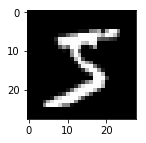

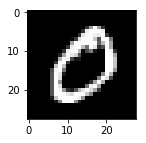

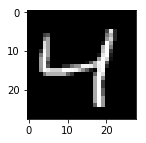

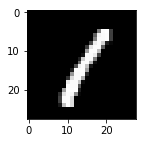

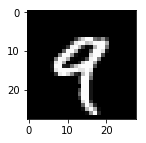

In [6]:
for i in range(5):
    plt.figure(figsize=(2,2))
    plt.imshow(x_train[i].reshape(img_rows, img_cols), cmap='gray')
    plt.show()

In [7]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

(60000, 'train samples')
(10000, 'test samples')


In [8]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [9]:
def create_mlp_model(verbose=True):
    model = Sequential()
    model.add(Dense(512, activation='relu', input_shape=(784,)))
    model.add(Dropout(0.2))
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(num_classes, activation='softmax'))
    
    if verbose:
        model.summary()

    model.compile(loss='categorical_crossentropy',
                  optimizer=RMSprop(), metrics=['accuracy'])
    return model

In [10]:
mlp_model = create_mlp_model()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [11]:
history = mlp_model.fit(x_train, y_train,
                        batch_size=batch_size,
                        epochs=epochs,
                        verbose=1, validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 6s 98us/step - loss: 0.2481 - acc: 0.9222 - val_loss: 0.1108 - val_acc: 0.9663
Epoch 2/12
60000/60000 [==============================] - 6s 95us/step - loss: 0.1003 - acc: 0.9690 - val_loss: 0.1025 - val_acc: 0.9708
Epoch 3/12
60000/60000 [==============================] - 6s 96us/step - loss: 0.0760 - acc: 0.9767 - val_loss: 0.0868 - val_acc: 0.9763
Epoch 4/12
60000/60000 [==============================] - 6s 96us/step - loss: 0.0605 - acc: 0.9815 - val_loss: 0.0672 - val_acc: 0.9818
Epoch 5/12
60000/60000 [==============================] - 6s 96us/step - loss: 0.0505 - acc: 0.9847 - val_loss: 0.0897 - val_acc: 0.9777
Epoch 6/12
60000/60000 [==============================] - 6s 96us/step - loss: 0.0450 - acc: 0.9867 - val_loss: 0.0804 - val_acc: 0.9806
Epoch 7/12
60000/60000 [==============================] - 6s 96us/step - loss: 0.0395 - acc: 0.9883 - val_loss: 0.0803 - val_acc

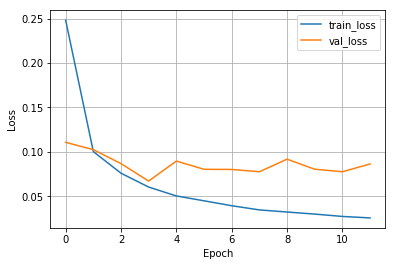

In [12]:
plot_loss(history.history['loss'], history.history['val_loss'])

Predict: 7, True: 7


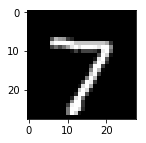

Predict: 2, True: 2


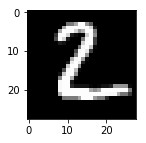

Predict: 1, True: 1


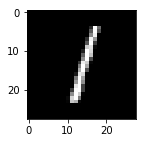

Predict: 0, True: 0


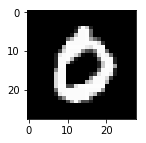

Predict: 4, True: 4


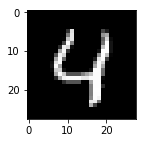

Predict: 1, True: 1


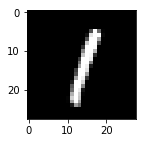

In [13]:
for i in range(6):
    print("Predict: {}, True: {}".format(
        mlp_model.predict(x_test)[i].argmax(),
        y_test[i].argmax()
    ))
    plt.figure(figsize=(2,2))
    plt.imshow(x_test[i].reshape(img_rows, img_cols), cmap='gray')
    plt.show()

In [14]:
score = mlp_model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

('Test loss:', 0.08640980354481781)
('Test accuracy:', 0.9843)
